In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("dataset/BreadBasket_DMS.csv")
print(data.info())
print(f"number of null value in Items: {data.Item.isnull().sum()}")
print(f"number of null value in Transaction: {data.Transaction.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None
number of null value in Items: 0
number of null value in Transaction: 0


isnull only checks if there is null value in dataframe, but some dataset instead of null, put other variable such as NaN, NoN, or etc. So we take glance at items of these dataset.

In [4]:
print(data.Item.unique())

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich'

As it is evident in item name, there is NONE variableb so we need to drop these samples.

In [5]:
data = data.drop(data[data.Item=='NONE'].index)

combinig date and time for further analysis:

In [6]:
data["DateTime"] = pd.to_datetime(data["Date"] +' '+ data["Time"])
data = data[["DateTime", "Transaction", 'Item']].set_index("DateTime")
data.head(5)

,Transaction,Item
DateTime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam


for analysing the data based on information of day of the week and hours of weekday, we add two thes tow columns.

In [7]:
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday + 1
data.head(5)

,Transaction,Item,hour,weekday
DateTime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7


94 Iteme were sold in 159 days
Avrage sale per day = 128


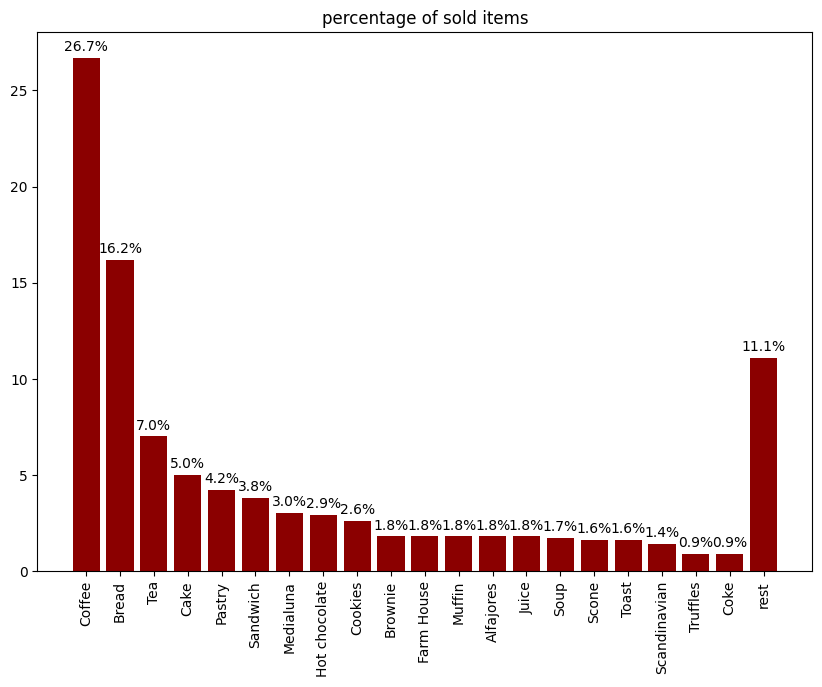

In [8]:
Days = len(np.unique(data.index.date))
Sales = data.shape[0]
print(f"{len(data.Item.unique())} Iteme were sold in {Days} days")
print(f"Avrage sale per day = {int(Sales/Days)}")

top_sold_Item = pd.DataFrame(data.Item.value_counts())
top_sold_Item["percent"] = data.Item.value_counts(normalize=True).mul(100).round(1)
top_20 = top_sold_Item.iloc[0:20,:]
top_20.loc["rest"] = top_sold_Item.iloc[20:,:].sum().values

fig, ax = plt.subplots(figsize=(10,7))
bar = ax.bar(top_20.index, top_20.percent,  color="darkred")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                    
autolabel(bar)
plt.xticks(rotation=90)
plt.title("percentage of sold items")
plt.show()

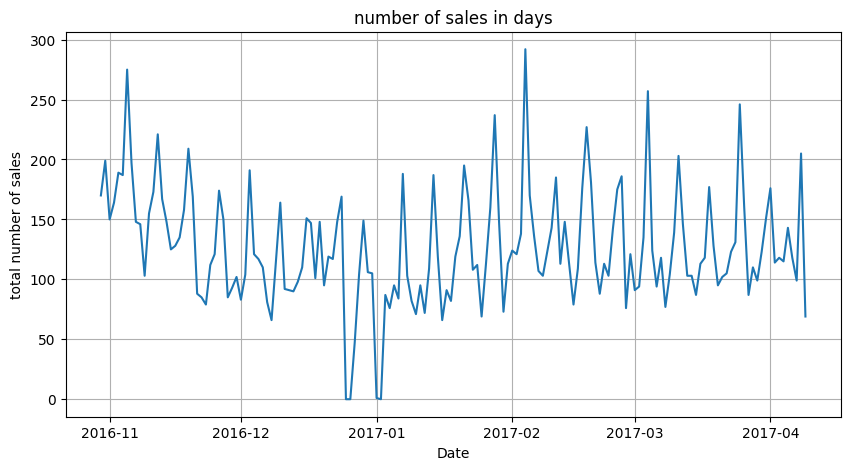

In [8]:
Days_sold = data.Item.resample("D").count()
fig, ax= plt.subplots(figsize=(10,5))
plt.plot(Days_sold.index, Days_sold.values)
plt.grid(True)
plt.title("number of sales in days")
plt.xlabel("Date")
plt.ylabel("total number of sales")
plt.show()

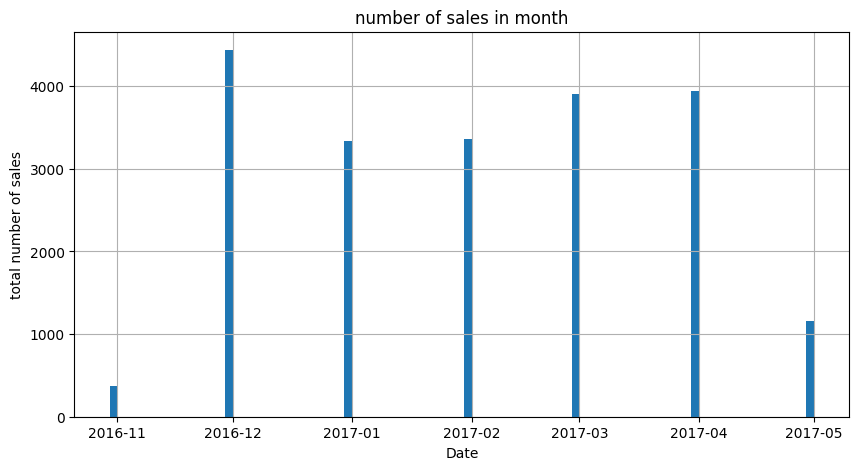

In [10]:
month_sold = data.Item.resample("M").count()
fig, ax= plt.subplots(figsize=(10,5))
plt.bar(month_sold.index, month_sold.values, width=2)
plt.grid(True)
plt.title("number of sales in month")
plt.xlabel("Date")
plt.ylabel("total number of sales")
plt.show()

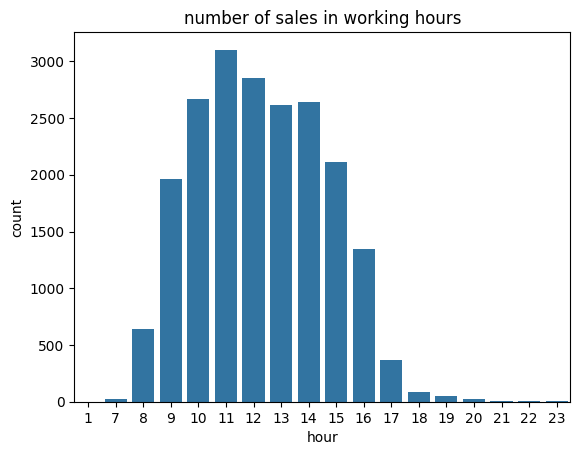

In [32]:
sns.countplot(x='hour',data=data)
plt.title("number of sales in working hours")
plt.show()

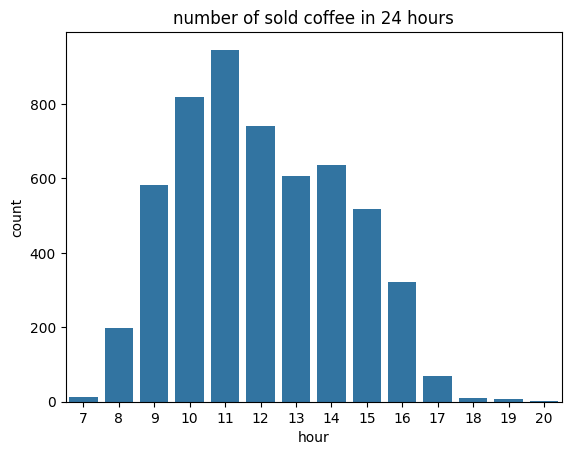

In [24]:
sns.countplot(x='hour',data=data.loc[data["Item"]=="Coffee"])
plt.title("number of sold coffee in working hours")
plt.show()

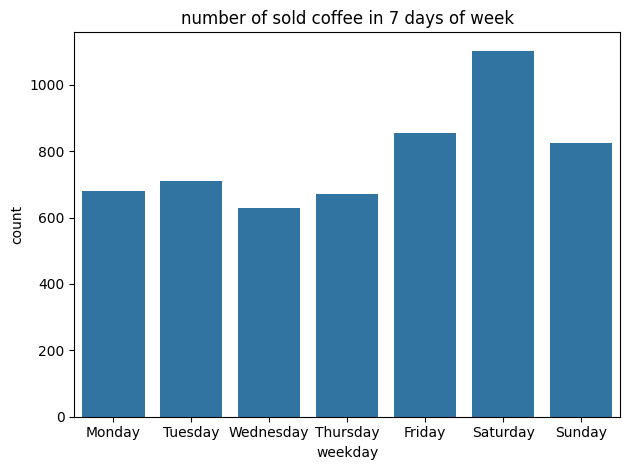

In [31]:

ax = sns.countplot(x='weekday',data=data.loc[data["Item"]=="Coffee"])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday",])
plt.title("number of sold coffee in 7 days of week")
plt.tight_layout()
plt.show()